<a href="https://colab.research.google.com/github/dn3ndra/DeepLearning/blob/main/03.%20Week%203/Assignment/SVHN_Datasets_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Mengambil dataset SVHN
train_data, test_data = tfds.load('svhn_cropped', split=['train', 'test'], as_supervised=True)

# Pra-proses data: normalisasi ke range [0, 1]
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.0  # Normalisasi
    return image, label

train_data = train_data.map(preprocess_image).batch(64).prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(preprocess_image).batch(64).prefetch(tf.data.AUTOTUNE)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.EIEVRD_3.1.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.EIEVRD_3.1.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.EIEVRD_3.1.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.1.0. Subsequent calls will reuse this data.


In [3]:
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # Output layer untuk 10 kelas
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
cnn_history = cnn_model.fit(train_data, epochs=10, validation_data=test_data)


Epoch 1/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.5787 - loss: 1.2622 - val_accuracy: 0.8433 - val_loss: 0.5457
Epoch 2/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.8688 - loss: 0.4490 - val_accuracy: 0.8722 - val_loss: 0.4465
Epoch 3/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8962 - loss: 0.3588 - val_accuracy: 0.8881 - val_loss: 0.4000
Epoch 4/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9109 - loss: 0.3082 - val_accuracy: 0.8995 - val_loss: 0.3660
Epoch 5/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9226 - loss: 0.2693 - val_accuracy: 0.9017 - val_loss: 0.3623
Epoch 6/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9323 - loss: 0.2370 - val_accuracy: 0.9040 - val_loss: 0.3656
Epoch 7/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9404 - loss: 0.2088 - val_accuracy: 0.8975 - val_loss: 0.4050
Epoch 8/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9463 -

In [5]:
def create_mlp_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  # Output layer untuk 10 kelas
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

mlp_model = create_mlp_model()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
mlp_history = mlp_model.fit(train_data, epochs=10, validation_data=test_data)


Epoch 1/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.1970 - loss: 2.2243 - val_accuracy: 0.4234 - val_loss: 1.7206
Epoch 2/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.4916 - loss: 1.5349 - val_accuracy: 0.5340 - val_loss: 1.4623
Epoch 3/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.6024 - loss: 1.2519 - val_accuracy: 0.5787 - val_loss: 1.3375
Epoch 4/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.6250 - loss: 1.1948 - val_accuracy: 0.5995 - val_loss: 1.3017
Epoch 5/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6339 - loss: 1.1657 - val_accuracy: 0.6018 - val_loss: 1.2983
Epoch 6/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.6411 - loss: 1.1477 - val_accuracy: 0.6014 - val_loss: 1.3044
Epoch 7/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6448 - loss: 1.1338 - val_accuracy: 0.6033 - val_loss: 1.3030
Epoch 8/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.6493 -

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def evaluate_model_metrics(model, test_data):
    y_true = []
    y_pred = []
    y_prob = []  # Untuk menghitung AUC-ROC

    for images, labels in test_data:
        preds = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))
        y_prob.extend(preds)

    # Menghitung metrik evaluasi
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Binarize labels untuk multi-class AUC
    y_true_bin = label_binarize(y_true, classes=range(10))
    auc = roc_auc_score(y_true_bin, y_prob, multi_class='ovr')

    return precision, recall, f1, auc



In [8]:
# Evaluasi model CNN
cnn_precision, cnn_recall, cnn_f1, cnn_auc = evaluate_model_metrics(cnn_model, test_data)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━

In [9]:
# Menampilkan hasil evaluasi untuk CNN
print("=== CNN Evaluation Summary ===")
print(f"Precision (Macro Avg): {cnn_precision:.4f}")
print(f"Recall (Macro Avg):    {cnn_recall:.4f}")
print(f"F1 Score (Macro Avg):  {cnn_f1:.4f}")
print(f"AUC-ROC (Macro):       {cnn_auc:.4f}")

=== CNN Evaluation Summary ===
Precision (Macro Avg): 0.8884
Recall (Macro Avg):    0.8917
F1 Score (Macro Avg):  0.8891
AUC-ROC (Macro):       0.9891


In [10]:

# Evaluasi model MLP
mlp_precision, mlp_recall, mlp_f1, mlp_auc = evaluate_model_metrics(mlp_model, test_data)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━

In [11]:
# Menampilkan hasil evaluasi untuk MLP
print("=== MLP Evaluation Summary ===")
print(f"Precision (Macro Avg): {mlp_precision:.4f}")
print(f"Recall (Macro Avg):    {mlp_recall:.4f}")
print(f"F1 Score (Macro Avg):  {mlp_f1:.4f}")
print(f"AUC-ROC (Macro):       {mlp_auc:.4f}")

=== MLP Evaluation Summary ===
Precision (Macro Avg): 0.6037
Recall (Macro Avg):    0.5837
F1 Score (Macro Avg):  0.5855
AUC-ROC (Macro):       0.8974


In [12]:
# Akurasi pada testing set
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(test_data)
print(f'CNN Model - Testing Accuracy: {cnn_test_accuracy * 100:.2f}%')


407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8998 - loss: 0.5055
CNN Model - Testing Accuracy: 89.81%


In [13]:
mlp_test_loss, mlp_test_accuracy = mlp_model.evaluate(test_data)
print(f'MLP Model - Testing Accuracy: {mlp_test_accuracy * 100:.2f}%')

407/407 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6154 - loss: 1.2598
MLP Model - Testing Accuracy: 61.62%


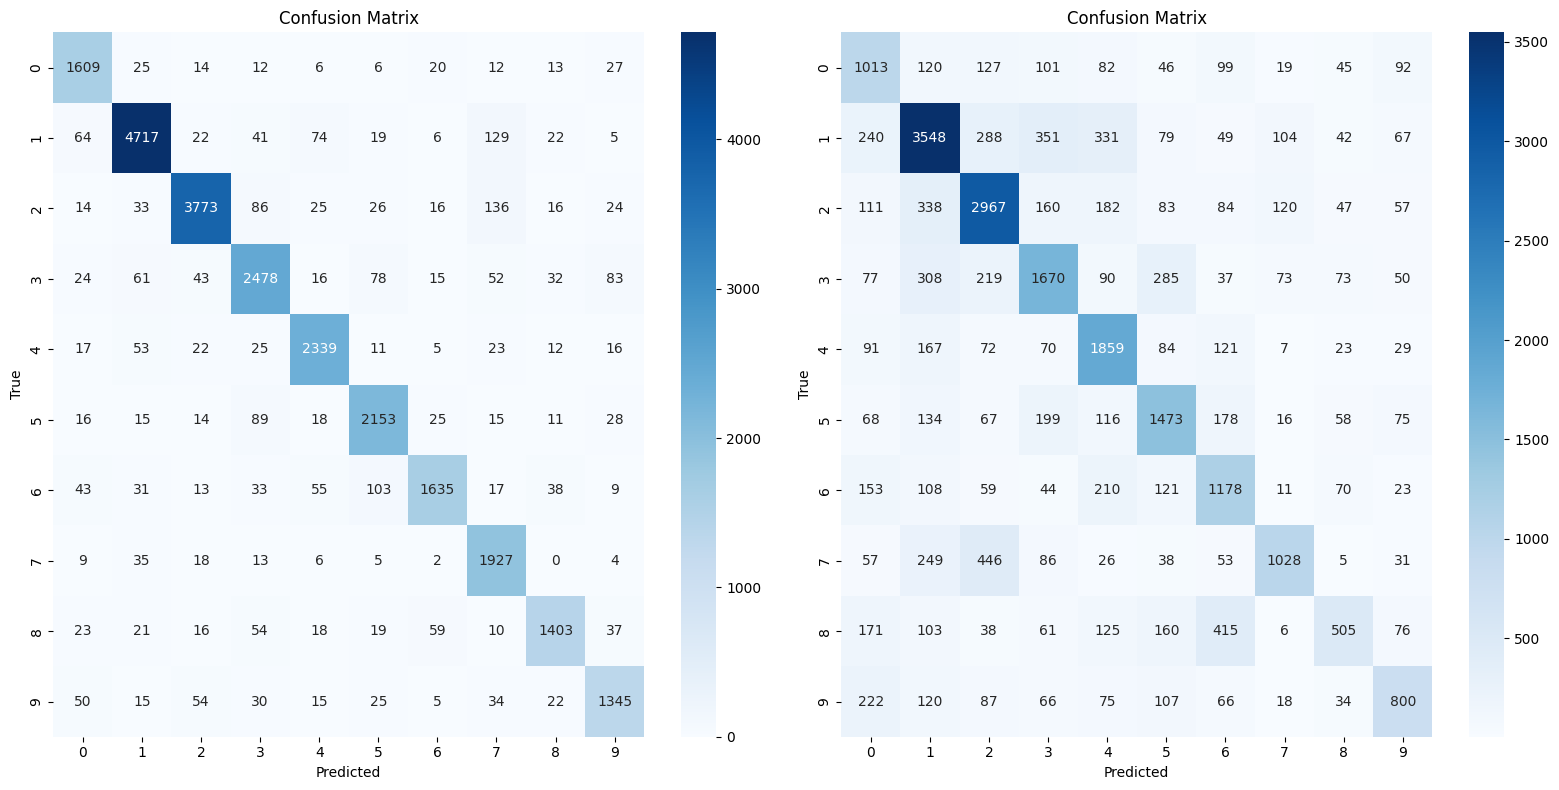

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, test_data, class_names, ax):
    y_true = []
    y_pred = []

    # Mengambil prediksi dan label dari data uji
    for inputs, labels in test_data:
        # Lakukan prediksi
        outputs = model(inputs, training=False)  # Pastikan model dalam mode evaluasi (training=False)
        predicted = np.argmax(outputs, axis=1)  # Ambil prediksi kelas dengan nilai tertinggi

        y_true.extend(labels.numpy())  # Konversi label ke numpy
        y_pred.extend(predicted)  # Ambil prediksi kelas

    # Menghitung confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Membuat heatmap dari confusion matrix di subplot yang disediakan
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

# Misalnya, untuk model CNN dan MLP, dan jika kita memiliki class names 0-9
class_names = [str(i) for i in range(10)]

# Buat subplot untuk menampilkan dua confusion matrix berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Visualisasi Confusion Matrix untuk CNN
plot_confusion_matrix(cnn_model, test_data, class_names, axes[0])

# Visualisasi Confusion Matrix untuk MLP
plot_confusion_matrix(mlp_model, test_data, class_names, axes[1])

plt.tight_layout()  # Agar layout lebih rapih
plt.show()


# Kesimpulan Evaluasi Model

Berdasarkan hasil evaluasi model CNN dan MLP pada dataset SVHN, berikut adalah kesimpulan yang dapat diambil:

## 1. CNN Model:
- **Precision (Macro Avg)**: 0.8884  
- **Recall (Macro Avg)**: 0.8917  
- **F1 Score (Macro Avg)**: 0.8891  
- **AUC-ROC (Macro)**: 0.9891  
- **Testing Accuracy**: 89.81%

### Analisis:
Model CNN menunjukkan kinerja yang sangat baik dengan hasil akurasi pada testing set mencapai **89.81%**. Precision, recall, dan F1-score yang tinggi menunjukkan bahwa model ini berhasil dengan baik dalam mengklasifikasikan berbagai kelas pada dataset SVHN. Selain itu, nilai AUC-ROC yang sangat tinggi (**0.9891**) menunjukkan bahwa model ini sangat efektif dalam membedakan antara kelas-kelas.

## 2. MLP Model:
- **Precision (Macro Avg)**: 0.6037  
- **Recall (Macro Avg)**: 0.5837  
- **F1 Score (Macro Avg)**: 0.5855  
- **AUC-ROC (Macro)**: 0.8974  
- **Testing Accuracy**: 61.62%

### Analisis:
Model MLP menunjukkan performa yang lebih rendah dibandingkan dengan CNN. Akurasi testing hanya mencapai **61.62%**, yang menunjukkan bahwa model MLP kurang mampu mengenali pola yang kompleks dalam data SVHN. Precision, recall, dan F1-score yang lebih rendah juga menunjukkan bahwa model ini kesulitan dalam mengklasifikasikan sebagian besar kelas dengan baik. Nilai AUC-ROC (**0.8974**) menandakan bahwa model ini kurang efektif dalam membedakan antara kelas.

## Rekomendasi:
- **CNN Model**: Model CNN menunjukkan hasil yang sangat baik dan lebih cocok untuk tugas klasifikasi pada dataset yang kompleks seperti SVHN, di mana gambar memiliki banyak fitur visual yang perlu dipelajari. CNN lebih mampu mengekstrak fitur spasial dari gambar, yang sangat penting untuk tugas ini.
  
- **MLP Model**: Model MLP, meskipun lebih sederhana, tidak dapat menangani kompleksitas data gambar dengan baik, terutama pada dataset yang besar dan rumit seperti SVHN. Disarankan untuk mencoba model arsitektur lain seperti CNN atau menerapkan teknik regularisasi untuk meningkatkan kinerja MLP.

Dengan demikian, **model CNN adalah pilihan yang lebih baik** untuk klasifikasi gambar pada dataset ini, sementara model MLP perlu dikembangkan lebih lanjut atau diganti dengan model lain yang lebih efektif.


# Penjelasan untuk Setiap Persamaan Matematika

Berikut adalah penjelasan untuk setiap persamaan matematika yang digunakan dalam evaluasi model, seperti **Precision**, **Recall**, **F1-Score**, **AUC-ROC**, dan lainnya:

## 1. **Precision (Macro Avg)**
Precision mengukur seberapa akurat model dalam mengklasifikasikan contoh positif.

### Persamaan:
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$
- **True Positives (TP)**: Jumlah contoh yang benar-benar positif dan terklasifikasikan dengan benar sebagai positif.
- **False Positives (FP)**: Jumlah contoh yang seharusnya negatif tetapi salah terklasifikasikan sebagai positif.

### Penjelasan:
Precision menunjukkan proporsi prediksi positif yang benar-benar benar. Semakin tinggi precision, semakin sedikit kesalahan prediksi positif.

## 2. **Recall (Macro Avg)**
Recall mengukur seberapa banyak dari semua contoh positif yang berhasil diidentifikasi oleh model.

### Persamaan:
$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$
- **True Positives (TP)**: Jumlah contoh yang benar-benar positif dan terklasifikasikan dengan benar sebagai positif.
- **False Negatives (FN)**: Jumlah contoh yang seharusnya positif tetapi salah terklasifikasikan sebagai negatif.

### Penjelasan:
Recall menunjukkan proporsi sebenarnya positif yang berhasil diidentifikasi oleh model. Semakin tinggi recall, semakin sedikit kesalahan dalam mengabaikan contoh positif.

## 3. **F1 Score (Macro Avg)**
F1 Score adalah rata-rata harmonik antara Precision dan Recall. F1 Score digunakan untuk mengukur kinerja model ketika data tidak seimbang antara kelas positif dan negatif.

### Persamaan:
$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

### Penjelasan:
F1 Score memberikan keseimbangan antara precision dan recall. Nilai F1 score yang lebih tinggi berarti model tidak hanya menghindari kesalahan prediksi positif (precision tinggi), tetapi juga tidak terlalu banyak melewatkan contoh positif (recall tinggi).

## 4. **AUC-ROC (Area Under the Curve - Receiver Operating Characteristic)**
AUC-ROC adalah ukuran kinerja model klasifikasi biner yang mempertimbangkan seluruh kemungkinan ambang batas keputusan. ROC (Receiver Operating Characteristic) adalah plot dari **True Positive Rate (TPR)** vs **False Positive Rate (FPR)** pada berbagai ambang batas.

### TPR (True Positive Rate) atau **Recall**:
$$
\text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} = \text{Recall}
$$

### FPR (False Positive Rate):
$$
\text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
$$

### AUC (Area Under the Curve):
AUC mengukur luas di bawah kurva ROC, yang memberikan gambaran umum tentang kemampuan model dalam membedakan antara kelas positif dan kelas negatif. AUC berkisar antara 0 dan 1:
- Nilai AUC mendekati 1 menunjukkan bahwa model memiliki kemampuan klasifikasi yang sangat baik.
- Nilai AUC mendekati 0 menunjukkan bahwa model hampir sepenuhnya salah.

### Penjelasan:
AUC-ROC adalah ukuran penting dalam klasifikasi karena mengukur kinerja model tanpa bergantung pada ambang batas klasifikasi. Ini memberi tahu kita seberapa baik model dapat membedakan kelas positif dan kelas negatif.

## 5. **Accuracy**
Akurasi adalah ukuran umum yang menunjukkan seberapa banyak prediksi model yang benar.

### Persamaan:
$$
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Samples}}
$$

### Penjelasan:
Akurasi mengukur seberapa sering model membuat prediksi yang benar. Namun, akurasi bisa menyesatkan dalam kasus kelas yang tidak seimbang, karena model dapat menghasilkan akurasi tinggi hanya dengan memprediksi kelas mayoritas.

## 6. **Confusion Matrix**
Confusion Matrix adalah tabel yang menggambarkan kinerja model klasifikasi. Itu mengandung empat elemen:
- **True Positives (TP)**: Prediksi benar untuk kelas positif.
- **False Positives (FP)**: Prediksi salah untuk kelas positif.
- **True Negatives (TN)**: Prediksi benar untuk kelas negatif.
- **False Negatives (FN)**: Prediksi salah untuk kelas negatif.

### Penjelasan:
Confusion matrix memberikan gambaran lengkap tentang performa model, yang dapat digunakan untuk menghitung berbagai metrik evaluasi, termasuk precision, recall, dan F1-score.


